In [321]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# *** KNN
from sklearn.neighbors import KNeighborsClassifier
# *** Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# *** Naive Bayes
from sklearn.naive_bayes import GaussianNB
# *** SVM classifier
from sklearn.svm import SVC
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
%matplotlib inline
import time
import requests
import json
import bs4
from bs4 import BeautifulSoup
import scipy as sc
!pip3 install riotwatcher

from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression


In [2]:
from riotwatcher import LolWatcher, ApiError

In [3]:
key="RGAPI-cdfb9677-7424-4b9a-ab8b-0aeee54a4bb6"

In [4]:
watcher = LolWatcher(key)

In [5]:
def get_rank_players(names):#names = list of name's to serch the rank for them
    ranks = list()
    counter = 0
    missing = 0
    for i in names:
        i.lower()
        #1:Download the html using requests:
        url = "https://lolprofile.net/summoner/eune/"+i #Work! <Response [200]>
        html = requests.get(url)
 
        #2:Parse this html with BeautifulSoup:
        soup = BeautifulSoup(html.content,"html.parser")#we make it html code build.
        #print(soup)
 
        #3:Extract the html that corresponds, from the soup.
        try:#have ppl with out that page in that website so we handle that for not crush the script.
            rank = soup("span",attrs={"class":"tier"})[0].get_text()#will give us Gold III/Platinum IV/etc..
 
            #4:handle the string and add it to the list:
            ranks.append(rank.split()[0])#split will take first word(until space without him), for exmpel: "Gold III"->"Gold"
            #print(rank)#will print Gold 
        except:
            print(f"didnt secces for name: {i} ")
            ranks.append(None)
            missing+=1
 
        counter+=1
 
        #5:sleep for not make hard life to there server's:
        if(counter%50==0):
            print(f"we pass {counter} page's and we have {len(ranks)-missing} rank's already, now we take 2 min break")
            time.sleep(30)
            print("60 sec left, do some movment exercise")
            time.sleep(30)
            print("30 sec left, be ready for the ")
            time.sleep(30)
            print("")
        elif(counter%10==0):
            print(f"we have {len(ranks)-missing} rank's in the list")
            time.sleep(2)#for each page wait 2 sec.
        else:
            time.sleep(2)#for each page wait 2 sec.
 
    df=pd.DataFrame({"Rank's":ranks})#make it dataframe.
    print("-----------------------------------------Done make Rank's df!----------------------------------------------")
    return df

In [6]:
def crowling_opgg(rank,num_of_names,page=0):#rank = list from top to botum rank's u want(Challenger I,Grandmaster I, etc..), num_of_names = how much name's do u want.
    #url="https://w...content-available-to-author-only...s.com/rankings/drakes"  blockd <Response [403]>
    #url="https://w...content-available-to-author-only...p.gg/ranking/ladder/" blockd <Response [403]>
    names = []#we will return this.
    while(num_of_names):
        print(f"page:{page+1}")
        #1:Download the html using requests.
        if(page=="0"):
            url = "https://lolprofile.net/leaderboards/eune" #Work! <Response [200]>
            html = requests.get(url)
            #html.content#//for see what we got.
        else:
            url = "https://lolprofile.net/leaderboards/eune"+"/"+f"{page}" #Work! <Response [200]>
            html = requests.get(url)
 
        #2:Parse this html with BeautifulSoup.
        soup = BeautifulSoup(html.content,"html.parser")#we make it html code build.
        #print(soup)
 
        #3:Extract the html that corresponds to the table, from the soup.    
        tbl = soup("table",attrs={"class":"table table1 s-c-table lb-table"})[0]
        #print(tbl)
 
        row = tbl("tr")
        #print(row)
        #print("-----------------------------")
 
        #4:Cheack each page and take the relevant name's if they in the rank we serch for.
        rank_count = len(rank)
        for i in range(20):#each page have 20 row's of player's infrometion
            for y in range(rank_count):#cheack if each player is in the rank we serch for
                name = row[i+1]("span")[0].get_text().strip()
                try:#if challnger
                    cheack = row[i+1]("span",attrs={"class":"b CHALLENGER-block"})[0].get_text().strip().lower()
                    cheack = cheack.split()[0]
                    if(cheack == (rank[y].lower())):
                        names.append(name)
                        num_of_names-=1
                        if(not num_of_names):
                            print("-------------------------------------------------Finish-----------------------------------------")
                            return names
                    break
                except:
                    h = 1
                try:#if grandmaster
                    cheack = row[i+1]("span",attrs={"class":"b GRANDMASTER-block"})[0].get_text().strip().lower()
                    cheack = cheack.split()[0]
                    if((cheack == rank[y].lower())):
                        names.append(name)
                        num_of_names-=1
                        if(not num_of_names):
                            print("-------------------------------------------------Finish-----------------------------------------")
                            return names
                        break
                except:
                    h = 1
 
                try:#if master
                    cheack = row[i+1]("span",attrs={"class":"b MASTER-block"})[0].get_text().strip().lower()
                    cheack = cheack.split()[0]
                    if((cheack == rank[y].lower())):
                        names.append(name)
                        num_of_names-=1
                        if(not num_of_names):
                            print("-------------------------------------------------Finish-----------------------------------------")
                            return names
                except:
                    h = 1
 
                try:#if diamond
                    cheack = row[i+1]("span",attrs={"class":"b DIAMOND-block"})[0].get_text().strip().lower()
                    cheack = cheack.split()[0]
                    if((cheack == rank[y].lower())):
                        names.append(name)
                        num_of_names-=1
                        if(not num_of_names):
                            print("-------------------------------------------------Finish-----------------------------------------")
                            return names
                except:
                    h = 1
 
 
                try:#if platinum
                    cheack = row[i+1]("span",attrs={"class":"b PLATINUM-block"})[0].get_text().strip().lower()
                    cheack = cheack.split()[0]
                    if((cheack == rank[y].lower())):
                        names.append(name)
                        num_of_names-=1
                        if(not num_of_names):
                            print("-------------------------------------------------Finish-----------------------------------------")
                            return names
                except:
                    h = 1
                try:#if gold
                    cheack = row[i+1]("span",attrs={"class":"b GOLD-block"})[0].get_text().strip().lower()
                    cheack = cheack.split()[0]
                    if((cheack == rank[y].lower())):
                        names.append(name)
                        num_of_names-=1
                        if(not num_of_names):
                            print("-------------------------------------------------Finish-----------------------------------------")
                            return names
                except:
                    h = 1
                try:#if silver
                    cheack = row[i+1]("span",attrs={"class":"b SILVER-block"})[0].get_text().strip().lower()
                    cheack = cheack.split()[0]
                    if((cheack == rank[y].lower())):
                        names.append(name)
                        num_of_names-=1
                        if(not num_of_names):
                            print("-------------------------------------------------Finish-----------------------------------------")
                            return names
                except:
                    h = 1
                try:#if bronze
                    cheack = row[i+1]("span",attrs={"class":"b BRONZE-block"})[0].get_text().strip().lower()
                    cheack = cheack.split()[0]
                    if((cheack == rank[y].lower())):
                        names.append(name)
                        num_of_names-=1
                        if(not num_of_names):
                            print("-------------------------------------------------Finish-----------------------------------------")
                            return names
                except:
                    h = 1
                try:#if iron
                    cheack = row[i+1]("span",attrs={"class":"b IRON-block"})[0].get_text().strip().lower()
                    cheack = cheack.split()[0]
                    if((cheack == rank[y].lower())):
                        names.append(name)
                        num_of_names-=1
                        if(not num_of_names):
                            print("-------------------------------------------------Finish-----------------------------------------")
                            return names
                except:
                    h = 1
        page+=1
        time.sleep(5)#for each page wait 5 sec.
        if(page%20==0):#for each 20 page's sleep 120 sec(2 min) for won't be to much requeast's.
            print("we pass 20 page's and now we will wait 2 min")
            print(f"until now we found {len(names)} name's ")
            time.sleep(30)
            print("90 sec is left, go make cofee")
            time.sleep(30)
            print("60 sec is left, relex and free you'r body")
            time.sleep(30)
            print("30 sec is left, sit down and be ready to keep going")
            time.sleep(30)
            print("now u ready so lets go!")
        else:
            print(f"we already have {len(names)} names in the list ")
 
    return 0#if enter 0 for some reason.

In [7]:
def get_matches(watcher,players,count):
    i=0
    match_list=list()
    for player in players:
        i+=1
        if(i%30==0):
            time.sleep(10)
        try:
            summoner_stats=watcher.summoner.by_name('eun1', player)
        except:
            print(player)
            print("Name not in the game")
            continue
        try:
            matches=watcher.match.matchlist_by_puuid("EUROPE", summoner_stats['puuid'],count=count)
        except:
            print(player)
            print("Something is wrong with this player")
        match_list.append(matches)
    return match_list

In [8]:
def get_list_of_players(count):
    players=list()
    tiers=['DIAMOND','PLATINUM','GOLD','SILVER','BRONZE','IRON']
    for tier in tiers:
        get_player=watcher.league.entries('EUN1','RANKED_SOLO_5x5',tier,'I')
        for i in range(count):
            players.append(get_player[i]['summonerName'])
    return players

In [9]:
count=25
players=get_list_of_players(count)

In [10]:
rank=['CHALLENGER','GRANDMASTER','MASTER']
challenger_player=crowling_opgg(['CHALLENGER'],25,0)
grandmaster_player=crowling_opgg(['GRANDMASTER'],25,8)
master_player=crowling_opgg(['MASTER'],25,61)


page:1
we already have 20 names in the list 
page:2
-------------------------------------------------Finish-----------------------------------------
page:9
we already have 1 names in the list 
page:10
we already have 13 names in the list 
page:11
we already have 19 names in the list 
page:12
we already have 19 names in the list 
page:13
we already have 20 names in the list 
page:14
we already have 20 names in the list 
page:15
-------------------------------------------------Finish-----------------------------------------
page:62
we already have 18 names in the list 
page:63
-------------------------------------------------Finish-----------------------------------------


In [11]:
players.extend(challenger_player)
players.extend(grandmaster_player)
players.extend(master_player)

In [12]:
games=3
matches=get_matches(watcher,players,games)

PolskiKoz
Name not in the game
DοpeMan
Name not in the game
Keeper Of Ice
Name not in the game
theywontbanme
Name not in the game
Friday My Day
Name not in the game


In [13]:
def build_df(wathcer,matches):
    names=list()
    df_win = list()
    df_KDA = list()
    df_IsSupport = list()
    df_totalDamageDealt = list()
    df_goldEarnedPerMinute = list()
    df_CsPerMinute = list()
    df_sightWardsBoughtInGame = list()
    df_visionScore = list()
    df_baronKills = list()
    df_dragonKills = list()
    df_longestTimeSpentLiving = list()
    df_damageDealtToBuildings= list()
    count=0
    gameDuration=None
    participants = []
    for ten_match in matches:
        for single_match in ten_match:
            match_detail = watcher.match.by_id("EUROPE", single_match)
            match_detail=match_detail['info']
            gameDuration=(match_detail['gameDuration']/60)
            if(gameDuration<3):
                continue
            participants_row = list()
            if(match_detail['gameMode']=='CLASSIC' or match_detail['gameMode']=='RANKED'):
                match_detail=match_detail['participants']
                for player in match_detail:
                    count+=1 #will count how much row we have on the list
                    if(count%150==0):
                        print(count)
                        print('============')
                        time.sleep(10)
                    if(count%1000==0):
                        time.sleep(150)
                    names.append(player['summonerName'])
                    try:
                        df_win.append(player['win'])
                    except:
                        print("win isn't found!")
                        df_win.append(None)
                    if(player['deaths']==0):
                        try:
                            df_KDA.append(player['assists']+player['kills'])
                        except:
                            print("assists or kills isn't found!")
                            df_KDA.append(None)
                    else:
                        try:
                            df_KDA.append((player['assists']+player['kills'])/player['deaths'])
                        except:
                            print("assists or kills or deaths isn't found!")
                            df_KDA.append(None)
                    try:
                        if(player['teamPosition']=='UTILITY'):
                            df_IsSupport.append(1)
                        else:
                            df_IsSupport.append(0)
                    except:
                        print("teamPosition isn't found!")
                        df_IsSupport.append(None)
                    try:
                        df_totalDamageDealt.append(player['totalDamageDealt']) 
                    except:
                        print("totalDamageDealt isn't found!")
                        df_totalDamageDealt.append(None)
                    try:
                        df_goldEarnedPerMinute.append(player['goldEarned'] / gameDuration)
                    except:
                        print("goldEarned isn't found!")
                        df_goldEarnedPerMinute.append(None)
                    try:    
                        Cs=(player['totalMinionsKilled']+player['neutralMinionsKilled'])/ gameDuration
                        df_CsPerMinute.append(Cs)
                    except:
                        print("totalMinionsKilled or neutralMinionsKilled isn't found!")
                        df_CsPerMinute.append(None)
                    try:
                        df_sightWardsBoughtInGame.append(player['sightWardsBoughtInGame'])
                    except:
                        print("sightWardsBoughtInGame isn't found!")
                        df_sightWardsBoughtInGame.append(None)
                    try:
                        df_visionScore.append(player['visionScore'])
                    except:
                        print("visionScore isn't found!")
                        df_visionScore.append(None)
                    try:
                        df_baronKills.append(player['baronKills'])
                    except:
                        print("baronKills isn't found!")
                        df_baronKills.append(None)
                    try:
                        df_dragonKills.append(player['dragonKills'])
                    except:
                        print("dragonKills isn't found!")
                        df_dragonKills.append(None)
                    try:
                        df_longestTimeSpentLiving.append(player['longestTimeSpentLiving'])
                    except:
                        print("longestTimeSpentLiving isn't found!")
                        df_longestTimeSpentLiving.append(None)
                    try:
                        df_damageDealtToBuildings.append(player['damageDealtToBuildings'])
                    except:
                        print("damageDealtToBuildings isn't found!")
                        df_damageDealtToBuildings.append(None)
    df=pd.DataFrame({"Win":df_win,"KDA":df_KDA,"IsSupport":df_IsSupport,"totalDamageDealt":df_totalDamageDealt
                                        ,"GoldPerMinute":df_goldEarnedPerMinute,"CsPerMinute":df_CsPerMinute,"SightWardsBought":df_sightWardsBoughtInGame
                                        ,"VisionScore":df_visionScore,"BaronKills":df_baronKills,"DragonKills":df_dragonKills,"Survived":df_longestTimeSpentLiving
                                        ,"DamageToTurrets":df_damageDealtToBuildings})#make it dataframe.
    return df, names

In [14]:
df,names=build_df(watcher,matches)

150
300
450
600
750
900
1050
1200
1350
1500
1650
1800
1950
2100
2250
2400
2550
2700
2850
3000
3150
3300
3450
3600
3750
3900
4050
4200
4350
4500
4650
4800
4950
5100
5250
5400
5550
5700
5850
6000


In [15]:
df_rank=get_rank_players(names)

didnt secces for name: Conqueror Akshan 
we have 9 rank's in the list
we have 19 rank's in the list
we have 29 rank's in the list
didnt secces for name: SigridwAiZb 
we have 38 rank's in the list
we pass 50 page's and we have 48 rank's already, now we take 2 min break
60 sec left, do some movment exercise
30 sec left, be ready for the 

we have 58 rank's in the list
we have 68 rank's in the list
we have 78 rank's in the list
we have 88 rank's in the list
didnt secces for name: Uncle Cupi 
we pass 100 page's and we have 97 rank's already, now we take 2 min break
60 sec left, do some movment exercise
30 sec left, be ready for the 

didnt secces for name: Uncle Cupi 
we have 106 rank's in the list
we have 116 rank's in the list
we have 126 rank's in the list
we have 136 rank's in the list
we pass 150 page's and we have 146 rank's already, now we take 2 min break
60 sec left, do some movment exercise
30 sec left, be ready for the 

we have 156 rank's in the list
we have 166 rank's in the l

In [16]:
challenger_player=crowling_opgg(['CHALLENGER'],5,1) #page 0
grandmaster_player=crowling_opgg(['GRANDMASTER'],5,9) #page 8
master_player=crowling_opgg(['MASTER'],5,63) #page 61
diamond_player=crowling_opgg(['DIAMOND'],5,500) #page 500
platinum_player=crowling_opgg(['PLATINUM'],5,2000) #page 2000
gold_player=crowling_opgg(['GOLD'],5,12000) #page 12000
silver_player=crowling_opgg(['SILVER'],5,40000) #page 40000
bronze_player=crowling_opgg(['BRONZE'],5,70000) #page 70000
iron_player=crowling_opgg(['IRON'],5,83000) #page 83000

page:2
-------------------------------------------------Finish-----------------------------------------
page:10
-------------------------------------------------Finish-----------------------------------------
page:64
-------------------------------------------------Finish-----------------------------------------
page:501
-------------------------------------------------Finish-----------------------------------------
page:2001
-------------------------------------------------Finish-----------------------------------------
page:12001
-------------------------------------------------Finish-----------------------------------------
page:40001
-------------------------------------------------Finish-----------------------------------------
page:70001
-------------------------------------------------Finish-----------------------------------------
page:83001
-------------------------------------------------Finish-----------------------------------------


In [17]:
new_player=list()
new_player.extend(challenger_player)
new_player.extend(grandmaster_player)
new_player.extend(master_player)
new_player.extend(diamond_player)
new_player.extend(platinum_player)
new_player.extend(gold_player)
new_player.extend(silver_player)
new_player.extend(bronze_player)
new_player.extend(iron_player)

In [18]:
games=3
matches=get_matches(watcher,new_player,games)

edru smurfer
Name not in the game
gibbygibbs2115
Name not in the game
Zoltanu
Name not in the game


In [19]:
extra_df,extra_names=build_df(watcher,matches)

150
300
450
600
750
900


In [20]:
extra_df_rank=get_rank_players(extra_names)

didnt secces for name: Dark Vèx 
we have 9 rank's in the list
didnt secces for name: l GeT RekT l 
we have 18 rank's in the list
we have 28 rank's in the list
didnt secces for name: betonfej 
we have 37 rank's in the list
didnt secces for name: aaPp 
didnt secces for name: ELO PRISONER1 
we pass 50 page's and we have 45 rank's already, now we take 2 min break
60 sec left, do some movment exercise
30 sec left, be ready for the 

didnt secces for name: Dr Bruiser 
didnt secces for name: Henry Cavill 
we have 53 rank's in the list
didnt secces for name: m1xxik 
we have 62 rank's in the list
we have 72 rank's in the list
we have 82 rank's in the list
we pass 100 page's and we have 92 rank's already, now we take 2 min break
60 sec left, do some movment exercise
30 sec left, be ready for the 

didnt secces for name: Fitness Ranger  
didnt secces for name: EatMyBalls 
didnt secces for name: ŚWINIE DO GAZU  
we have 99 rank's in the list
we have 109 rank's in the list
didnt secces for name: Ší

In [32]:
df_copy=df.copy()
df_rank_copy=df_rank.copy()
extra_df_copy=extra_df.copy()
extra_df_rank_copy=extra_df_rank.copy()

In [33]:
df_copy['Rank']=df_rank_copy["Rank's"]
extra_df_copy['Rank']=extra_df_rank_copy["Rank's"]

In [34]:
frames = [df_copy, extra_df_copy]
result_df = pd.concat(frames)

In [35]:
result_df.drop_duplicates(inplace=True)
result_df.dropna(inplace=True)

In [703]:
def transfer_obj_to_num(df):
    copy=df.copy()
    replace_map={"Challenger":1 , "Grandmaster":2 , "Master":3 , "Diamond":4 , "Platinum":5
                , "Gold":6 , "Silver":7 , "Bronze":8,"Iron":9}
    copy=copy.replace({"Rank":replace_map})
    copy['Win']=np.where(copy['Win']==True,1,0)
    return copy

In [164]:
def get_frequent_elements(df, col_name, num_top_elements):
    ser=df[col_name].value_counts()[:num_top_elements]
    return ser.sort_index()

In [167]:
def one_dim_plot(sr, plot_type, axis):
    sr.plot(kind=plot_type,ax=axis)

In [165]:
def plot_frequent_elements(df, df_in_params):
    fig, axes = plt.subplots(1,df_in_params.shape[0], figsize=(20,5))
    for i in range(df_params.shape[0]):
        x=get_frequent_elements(df,df_params['col_name'][i],df_params['num_top_elements'][i])
        one_dim_plot(x,df_params['plot_type'][i],axes[i])

In [175]:
def cross_tabulation(df, col_name, other_col_name):
    ct=pd.crosstab(df[col_name],df[other_col_name],normalize='index')
    return ct

In [176]:
def plot_cross_tabulation(df, col_names, other_col_name):
    i=0
    fig, axes = plt.subplots(1,len(col_names), figsize=(20,5))
    for name1 in col_names:
        new_df=cross_tabulation(df,name1,other_col_name)
        new_df.plot(ax=axes[i])
        i=i+1

In [183]:
def get_highly_correlated_cols(df):
    correlations=list()
    tuple_arr=list()
    num=df.select_dtypes(include=['number']).columns
    for i in range(len(num)):
        for j in range(len(num)):
            if(i>j):
                corr=df[num[i]].corr(df[num[j]])
                if(corr>=0.5):
                    tup=(df.columns.get_loc(num[j]),df.columns.get_loc(num[i]))
                    tuple_arr.append(tup)
                    correlations.append(corr)
    return correlations, tuple_arr

In [193]:
def plot_high_correlated_scatters(df):
    corr, tuples = get_highly_correlated_cols(df)
    fig, axes = plt.subplots(1,len(corr), figsize=(20,5))
    i=0
    for pair in tuples:
        col_name1=df.columns[pair[0]]
        col_name2=df.columns[pair[1]]
        titleName= "corr('%s', '%s')=%4.2f" %(col_name1, col_name2, corr[i])
        df.plot.scatter(x=col_name1,y=col_name2,ax=axes[i],title=titleName)
        i+=1

In [418]:
removeAFK=result_df[(result_df['totalDamageDealt']>500) & (result_df['Survived']!=0) & (result_df['rank']!='Unranked')]

In [159]:
final =transfer_obj_to_num(removeAFK)

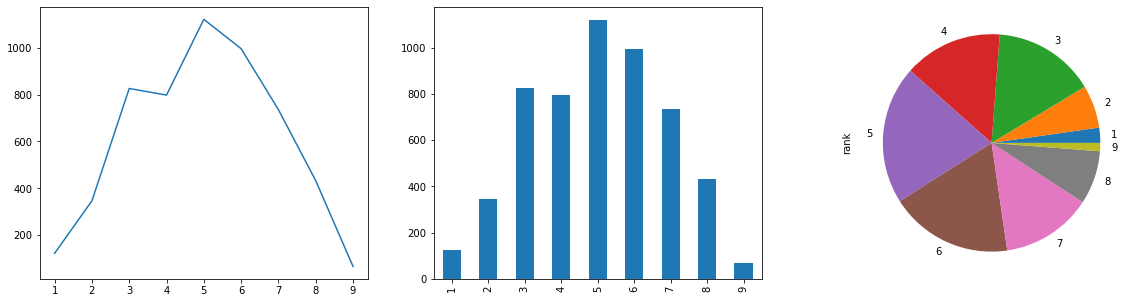

In [170]:
df_params = pd.DataFrame({'plot_type': ['line', 'bar', 'pie'], 
                          'col_name': ['rank', 'rank', 'rank'],
                          'num_top_elements': [9,9,9]})
plot_frequent_elements(final, df_params)


In [173]:
final

,Win,KDA,IsSupport,totalDamageDealt,GoldPerMinute,CsPerMinute,SightWardsBought,VisionScore,BaronKills,DragonKills,Survived,DamageToTurrets,rank
0,0,0.700000,0,142641,403.145695,6.258278,0,17,0,0,307,5241,2
1,0,2.250000,0,155332,410.529801,5.529801,0,17,0,1,301,1777,1
2,0,1.076923,0,121455,471.920530,5.099338,0,6,0,0,242,6860,5
3,0,2.125000,0,137383,414.635762,7.019868,0,26,0,0,679,4277,4
4,0,2.100000,1,13661,287.185430,0.364238,0,76,0,0,676,1346,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0,1.111111,0,121503,382.568807,4.472477,0,12,0,0,332,2751,9
964,0,2.000000,0,42613,255.963303,1.857798,0,3,0,0,496,2032,9
967,1,3.666667,0,98446,354.116972,3.130734,0,13,0,0,558,3307,8
968,1,3.000000,0,77720,337.396789,2.683486,0,18,0,0,517,3094,8


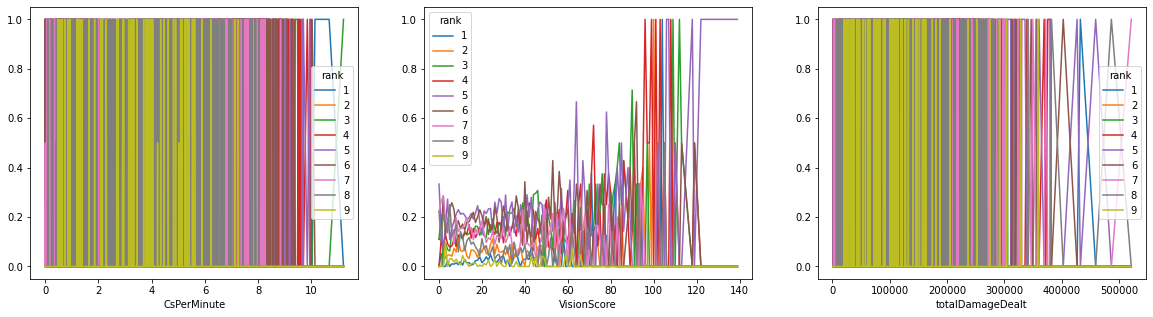

In [182]:
plot_cross_tabulation(final,['CsPerMinute','VisionScore','totalDamageDealt'],'rank')

In [185]:
cols_for_correlations = ['Win', 'KDA', 'IsSupport', 'totalDamageDealt', 'GoldPerMinute', 
                         'CsPerMinute', 'SightWardsBought', 'VisionScore', 
                         'BaronKills', 'DragonKills', 'Survived', 'DamageToTurrets', 'rank']
correlations, tuple_arr = get_highly_correlated_cols(final[cols_for_correlations])

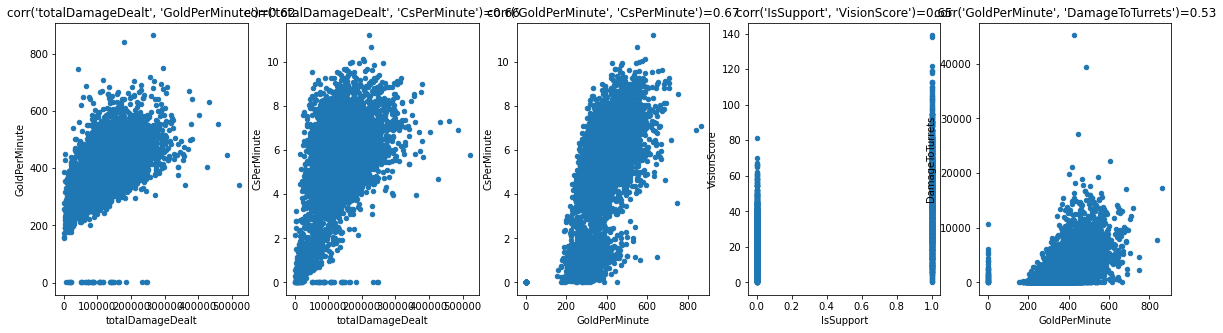

In [194]:
plot_high_correlated_scatters(final[cols_for_correlations])

In [195]:
remove_supp=final[final['IsSupport']==0]

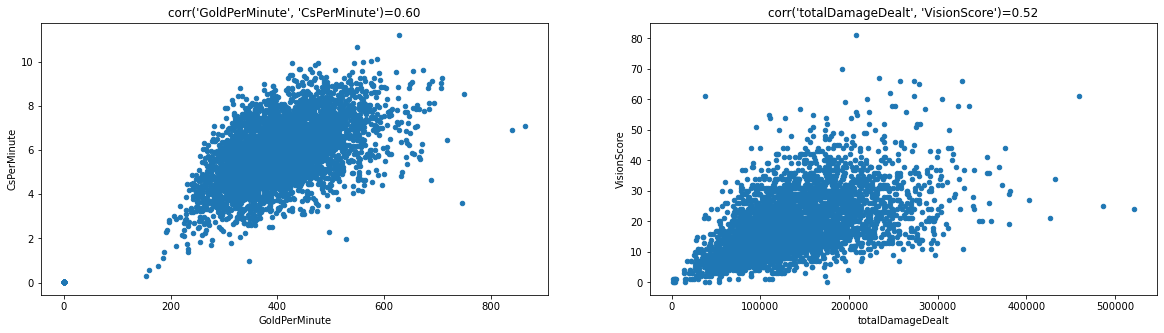

In [197]:
plot_high_correlated_scatters(remove_supp[cols_for_correlations])

In [200]:
def split_to_train_and_test(dataset, label_column, test_ratio, rand_state):
    col=dataset.columns.drop(label_column)
    X=dataset[col]
    y=dataset[label_column]
    XTrain,XTest,yTrain,yTest=train_test_split(X,y,random_state=rand_state,test_size=test_ratio)
    return XTrain,XTest,yTrain,yTest

In [205]:
def get_classifier_obj(classifier_name, params):
    if(classifier_name=='KNN'):
        if(params):
            clf=KNeighborsClassifier(n_neighbors=params['n_neighbors'])
        else:
            clf=KNeighborsClassifier()
    if(classifier_name=='naive_bayes'):
        clf=GaussianNB()
    if(classifier_name=='svm'):
        clf = svm.SVC()
    if(classifier_name=='decision_tree'):
        if(params):
            clf=tree.DecisionTreeClassifier(max_depth=params['max_depth'],min_samples_split=params['min_samples_split'])
        else:
            clf=tree.DecisionTreeClassifier()
    if(classifier_name=='random_forest'):
        if(params):
            clf=RandomForestClassifier(n_estimators=params['n_estimators'])
        else:
            clf=RandomForestClassifier()
    return clf

In [206]:
def calc_evaluation_val(eval_metric, y_test, y_predicted):
    if(eval_metric=="accuracy"):
        evaluation_val=metrics.accuracy_score(y_true=y_test,y_pred=y_predicted)
    if(eval_metric=="precision"):
        evaluation_val=metrics.precision_score(y_true=y_test,y_pred=y_predicted)
    if(eval_metric=="recall"):
        evaluation_val=metrics.recall_score(y_true=y_test,y_pred=y_predicted)
    if(eval_metric=="f1"):
        evaluation_val=metrics.f1_score(y_true=y_test,y_pred=y_predicted)
    if(eval_metric=="confusion_matrix"):
        evaluation_val=metrics.confusion_matrix(y_true=y_test,y_pred=y_predicted)
    return evaluation_val

In [287]:
def find_best_k_for_KNN(X_train, y_train):
    parameters = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23,25] }
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, parameters,scoring=make_scorer(metrics.r2_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_K=clf.best_params_['n_neighbors']
    best_r2_val=clf.best_score_
    return best_K, best_r2_val

In [890]:
def find_best_decision_tree_params(X_train, y_train):
    parameters = {'max_depth':[2,4,6,8,10,12,14,16,18,20],"min_samples_split":[5,10,20,40,80,160] }
    dt = tree.DecisionTreeClassifier()
    clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.r2_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_max_depth=clf.best_params_['max_depth']
    best_min_samples_split=clf.best_params_['min_samples_split']
    best_r2_val=clf.best_score_
    return best_max_depth, best_min_samples_split, best_r2_val

In [289]:
def find_best_random_forest_num_estimators(X_train, y_train):
    parameters = {'n_estimators':[11,51,71] }
    rf = RandomForestClassifier()
    clf = GridSearchCV(rf, parameters,scoring=make_scorer(metrics.r2_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_num_estimators=clf.best_params_['n_estimators']
    best_r2_val=clf.best_score_
    return best_num_estimators, best_r2_val

In [290]:
test_ratio, rand_state = 0.2, 42
category_col_name = 'rank'
X_train, X_test, y_train, y_test = split_to_train_and_test(remove_supp, category_col_name, test_ratio, rand_state)
best_K, best_r2_KNN_params = find_best_k_for_KNN(X_train, y_train)
print(best_K)
print(best_f1_KNN_params)

23
-0.47105054067417845


In [895]:
best_max_depth, best_min_samples_split,best_r2_val = find_best_decision_tree_params(X_train, y_train)
print(best_max_depth)
print(best_min_samples_split)
print(best_r2_val)

2
5
0.010799035835787053


In [894]:
best_num_estimators,best_r2_val=find_best_random_forest_num_estimators(X_train, y_train)
print(best_num_estimators)
print(best_r2_val)

51
-0.10121344158233066


In [902]:
clf3=LinearRegression()
clf3.fit(X_train,y_train)
y_pred2=clf3.predict(X_test)
evalu=metrics.f1_score(y_test,y_pred2)

In [903]:
evalu

0.20817898481326946

In [323]:
evaluate=cross_val_score(clf3, X_train, y_train, cv=10,scoring='r2').mean()

In [324]:
evaluate

0.20488226574245877

In [612]:
final2 =remove_supp.copy()
final2=final2[final2['IsSupport']==0]

In [613]:
col=final2.columns.drop(['IsSupport'])
final2=final2[col]

In [614]:
final2=final2[final2['DamageToTurrets']>=100]


In [620]:
final2['CsPerMinute']=final2['CsPerMinute']*final2['CsPerMinute']

In [907]:
final2

,Win,KDA,totalDamageDealt,GoldPerMinute,CsPerMinute,SightWardsBought,VisionScore,BaronKills,DragonKills,Survived,DamageToTurrets,rank
0,0,0.700000,142641,403.145695,39.166045,0,17,0,0,307,5241,2
1,0,2.250000,155332,410.529801,30.578703,0,17,0,1,301,1777,1
2,0,1.076923,121455,471.920530,26.003245,0,6,0,0,242,6860,5
3,0,2.125000,137383,414.635762,49.278540,0,26,0,0,679,4277,4
6,1,5.750000,197734,485.033113,34.739704,0,19,1,2,668,6914,2
...,...,...,...,...,...,...,...,...,...,...,...,...
958,0,2.666667,82928,416.522318,16.299860,0,5,0,0,369,2773,9
961,0,1.111111,121503,382.568807,20.003051,0,12,0,0,332,2751,9
964,0,2.000000,42613,255.963303,3.451414,0,3,0,0,496,2032,9
967,1,3.666667,98446,354.116972,9.801495,0,13,0,0,558,3307,8


In [622]:
test_ratio, rand_state = 0.2, 42
category_col_name = 'rank'
X_train2, X_test2, y_train2, y_test2 = split_to_train_and_test(final2, category_col_name, test_ratio, rand_state)

In [623]:
clf2=LinearRegression()
clf2.fit(X_train2,y_train2)
y_pred=clf2.predict(X_test2)
evaluate=cross_val_score(clf2, X_train2, y_train2, cv=10,scoring='r2').mean()

In [624]:
evaluate

0.2268054466390963

In [706]:
def remove_outliers(df):
    copy=df.copy()
    challenger=copy[copy['Rank']==1]
    grandmaster=copy[copy['Rank']==2]
    master=copy[copy['Rank']==3]
    diamond=copy[copy['Rank']==4]
    platinum=copy[copy['Rank']==5]
    gold=copy[copy['Rank']==6]
    silver=copy[copy['Rank']==7]
    bronze=copy[copy['Rank']==8]
    iron=copy[copy['Rank']==9]
    frames = [challenger, grandmaster, master , diamond , platinum , gold , silver , bronze , iron]
    for dataset in frames:
        for x in dataset:
            Q1 = np.percentile(dataset[x], 25)
            Q3 = np.percentile(dataset[x], 75)
            IQR = Q3 - Q1
            dataset[x][(dataset[x]< Q1 - 1.5*IQR) | (dataset[x] > Q3 + 1.5*IQR )] = np.nan#if he outlier it will make him nan(float type).
            dataset.dropna(inplace=True)
    result=pd.concat(frames)
    return result

In [655]:
final3=remove_outliers(final2)

<ipython-input-654-8d2ac9be8d46>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[x][(dataset[x]< Q1 - 1.5*IQR) | (dataset[x] > Q3 + 1.5*IQR )] = np.nan#if he outlier it will make him nan(float type).
C:\Users\Liad\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-654-8d2ac9be8d46>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [908]:
final3

,Win,KDA,totalDamageDealt,GoldPerMinute,CsPerMinute,SightWardsBought,VisionScore,BaronKills,DragonKills,Survived,DamageToTurrets,rank
25,1,1.888889,121162.0,481.268116,31.947070,0,14.0,0.0,0.0,255.0,8918.0,1
131,1,2.888889,173347.0,458.298906,24.576535,0,25.0,0.0,0.0,419.0,2481.0,1
297,1,5.750000,174395.0,612.028386,57.655777,0,20.0,0.0,0.0,612.0,7703.0,1
313,0,2.333333,164382.0,448.030481,75.463745,0,16.0,0.0,0.0,444.0,941.0,1
4451,1,6.250000,173572.0,638.529048,64.158318,0,18.0,0.0,0.0,495.0,3646.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
932,1,3.714286,101068.0,521.161695,23.990004,0,6.0,0.0,0.0,245.0,6410.0,9
943,0,1.833333,151764.0,366.612962,8.666998,0,23.0,0.0,1.0,637.0,4576.0,9
958,0,2.666667,82928.0,416.522318,16.299860,0,5.0,0.0,0.0,369.0,2773.0,9
961,0,1.111111,121503.0,382.568807,20.003051,0,12.0,0.0,0.0,332.0,2751.0,9


In [658]:
test_ratio, rand_state = 0.2, 42
category_col_name = 'rank'
X_train3, X_test3, y_train3, y_test3 = split_to_train_and_test(final3, category_col_name, test_ratio, rand_state)

In [896]:
clf3=LinearRegression()
clf3.fit(X_train3,y_train3)
y_pred=clf3.predict(X_test3)
evaluate=cross_val_score(clf3, X_train3, y_train3, cv=10,scoring='r2').mean()

In [897]:
evaluate

0.30126591191277763

In [663]:
def improved_build_df(wathcer,matches):
    names=list()
    df_win = list()
    df_KDA = list()
    df_totalDamageDealt = list()
    df_goldEarnedPerMinute = list()
    df_CsPerMinute = list()
    df_sightWardsBoughtInGame = list()
    df_visionScore = list()
    df_baronKills = list()
    df_dragonKills = list()
    df_longestTimeSpentLiving = list()
    df_damageDealtToBuildings= list()
    count=0
    gameDuration=None
    participants = []
    for ten_match in matches:
        for single_match in ten_match:
            match_detail = watcher.match.by_id("EUROPE", single_match)
            match_detail=match_detail['info']
            gameDuration=(match_detail['gameDuration']/60)
            if(gameDuration<3):
                continue
            participants_row = list()
            if(match_detail['gameMode']=='CLASSIC' or match_detail['gameMode']=='RANKED'):
                match_detail=match_detail['participants']
                for player in match_detail:
                    try:
                        if((player['totalDamageDealt']<500) or (player['longestTimeSpentLiving']<=20) or (player['damageDealtToBuildings']<=100) or (player['teamPosition']=='UTILITY')):
                            continue
                    except:
                        print("error when finding data")
                        continue
                    count+=1 #will count how much row we have on the list
                    if(count%150==0):
                        print(count)
                        print('============')
                        time.sleep(10)
                    if(count%1000==0):
                        time.sleep(150)
                    names.append(player['summonerName'])
                    try:
                        df_win.append(player['win'])
                    except:
                        print("win isn't found!")
                        df_win.append(None)
                    if(player['deaths']==0):
                        try:
                            df_KDA.append(player['assists']+player['kills'])
                        except:
                            print("assists or kills isn't found!")
                            df_KDA.append(None)
                    else:
                        try:
                            df_KDA.append((player['assists']+player['kills'])/player['deaths'])
                        except:
                            print("assists or kills or deaths isn't found!")
                            df_KDA.append(None)
                    try:
                        df_totalDamageDealt.append(player['totalDamageDealt']) 
                    except:
                        print("totalDamageDealt isn't found!")
                        df_totalDamageDealt.append(None)
                    try:
                        df_goldEarnedPerMinute.append(player['goldEarned'] / gameDuration)
                    except:
                        print("goldEarned isn't found!")
                        df_goldEarnedPerMinute.append(None)
                    try:    
                        Cs=(player['totalMinionsKilled']+player['neutralMinionsKilled'])/ gameDuration
                        df_CsPerMinute.append(Cs)
                    except:
                        print("totalMinionsKilled or neutralMinionsKilled isn't found!")
                        df_CsPerMinute.append(None)
                    try:
                        df_sightWardsBoughtInGame.append(player['sightWardsBoughtInGame'])
                    except:
                        print("sightWardsBoughtInGame isn't found!")
                        df_sightWardsBoughtInGame.append(None)
                    try:
                        df_visionScore.append(player['visionScore'])
                    except:
                        print("visionScore isn't found!")
                        df_visionScore.append(None)
                    try:
                        df_baronKills.append(player['baronKills'])
                    except:
                        print("baronKills isn't found!")
                        df_baronKills.append(None)
                    try:
                        df_dragonKills.append(player['dragonKills'])
                    except:
                        print("dragonKills isn't found!")
                        df_dragonKills.append(None)
                    try:
                        df_longestTimeSpentLiving.append(player['longestTimeSpentLiving'])
                    except:
                        print("longestTimeSpentLiving isn't found!")
                        df_longestTimeSpentLiving.append(None)
                    try:
                        df_damageDealtToBuildings.append(player['damageDealtToBuildings'])
                    except:
                        print("damageDealtToBuildings isn't found!")
                        df_damageDealtToBuildings.append(None)
    df=pd.DataFrame({"Win":df_win,"KDA":df_KDA,"IsSupport":df_IsSupport,"totalDamageDealt":df_totalDamageDealt
                                        ,"GoldPerMinute":df_goldEarnedPerMinute,"CsPerMinute":df_CsPerMinute,"SightWardsBought":df_sightWardsBoughtInGame
                                        ,"VisionScore":df_visionScore,"BaronKills":df_baronKills,"DragonKills":df_dragonKills,"Survived":df_longestTimeSpentLiving
                                        ,"DamageToTurrets":df_damageDealtToBuildings})#make it dataframe.
    return df, names

In [664]:
count=50
players=get_list_of_players(count)

In [666]:
challenger_player=crowling_opgg(['CHALLENGER'],60,0)
grandmaster_player=crowling_opgg(['GRANDMASTER'],50,8)
master_player=crowling_opgg(['MASTER'],50,61)

page:1
we already have 20 names in the list 
page:2
we already have 40 names in the list 
page:3
-------------------------------------------------Finish-----------------------------------------
page:9
we already have 1 names in the list 
page:10
we already have 13 names in the list 
page:11
we already have 19 names in the list 
page:12
we already have 19 names in the list 
page:13
we already have 20 names in the list 
page:14
we already have 20 names in the list 
page:15
we already have 34 names in the list 
page:16
-------------------------------------------------Finish-----------------------------------------
page:62
we already have 18 names in the list 
page:63
we already have 37 names in the list 
page:64
-------------------------------------------------Finish-----------------------------------------


In [667]:
players.extend(challenger_player)
players.extend(grandmaster_player)
players.extend(master_player)
games=4
b_matches=get_matches(watcher,players,games)

Unabletofind
Name not in the game
PolskiKoz
Name not in the game
DοpeMan
Name not in the game
GrünerDino
Name not in the game
EU Domel
Name not in the game
Keeper Of Ice
Name not in the game
theywontbanme
Name not in the game
Friday My Day
Name not in the game
Giant Enemy Crab
Name not in the game
edru smurfer
Name not in the game
edru smurfer
Name not in the game
lInceen
Name not in the game


In [668]:
new_df,names=build_df(watcher,b_matches)

150
300
450
600
750
900
1050
1200
1350
1500
1650
1800
1950
2100
2250
2400
2550
2700
2850
3000
3150
3300
3450
3600
3750
3900
4050
4200
4350
4500
4650
4800
4950
5100
5250
5400
5550
5700
5850
6000
6150
6300
6450
6600
6750
6900
7050
7200
7350
7500
7650
7800
7950
8100
8250
8400
8550
8700
8850
9000
9150
9300
9450
9600
9750
9900
10050
10200
10350
10500
10650
10800
10950
11100
11250
11400
11550
11700
11850
12000
12150
12300
12450
12600
12750
12900
13050
13200
13350
13500
13650
13800
13950
14100
14250
14400
14550
14700
14850
15000
15150
15300
15450
15600
15750
15900
16050


In [675]:
b_df_rank=get_rank_players(names)

we have 10 rank's in the list
didnt secces for name: Uncle Cupi 
we have 19 rank's in the list
we have 29 rank's in the list
didnt secces for name: kha killa flow 
we have 38 rank's in the list
didnt secces for name: SigridwAiZb 
we pass 50 page's and we have 47 rank's already, now we take 2 min break
60 sec left, do some movment exercise
30 sec left, be ready for the 

we have 57 rank's in the list
we have 67 rank's in the list
didnt secces for name: gI in esports 
we have 76 rank's in the list
we have 86 rank's in the list
we pass 100 page's and we have 96 rank's already, now we take 2 min break
60 sec left, do some movment exercise
30 sec left, be ready for the 

we have 106 rank's in the list
we have 116 rank's in the list
we have 126 rank's in the list
we have 136 rank's in the list
we pass 150 page's and we have 146 rank's already, now we take 2 min break
60 sec left, do some movment exercise
30 sec left, be ready for the 

we have 156 rank's in the list
we have 166 rank's in the

In [909]:
project=new_df.copy()
project['Rank']=b_df_rank["Rank's"]

In [768]:
project.to_excel("finalProjectBeforeAdjusting.xlsx")

In [874]:
project=project[project['Survived']>100]
project=project[project['IsSupport']==0]
project=project[project['DamageToTurrets']>500]
project.drop_duplicates(inplace=True)
project.dropna(inplace=True)

In [911]:
project.describe()

,KDA,IsSupport,totalDamageDealt,GoldPerMinute,CsPerMinute,SightWardsBought,VisionScore,BaronKills,DragonKills,Survived,DamageToTurrets
count,16070.000000,16070.000000,16070.000000,16070.000000,16070.000000,16070.0,16070.000000,16070.000000,16070.000000,16070.000000,16070.000000
mean,3.469909,0.199813,113630.904916,382.223917,4.911595,0.0,23.889421,0.092906,0.396951,565.030118,2736.755632
std,3.868958,0.399872,67889.562046,93.651382,2.370221,0.0,17.473055,0.315577,0.828909,269.526067,3042.699363
min,0.000000,0.000000,0.000000,0.223032,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.285714,0.000000,63302.500000,317.031351,3.732726,0.0,13.000000,0.000000,0.000000,385.000000,452.000000
50%,2.285714,0.000000,109298.500000,377.689913,5.405709,0.0,19.000000,0.000000,0.000000,519.000000,1755.500000
75%,4.000000,0.000000,155900.750000,442.918247,6.599783,0.0,29.000000,0.000000,0.000000,700.750000,4086.000000
max,55.000000,1.000000,580060.000000,1277.396907,11.295972,0.0,181.000000,3.000000,5.000000,2030.000000,43604.000000


In [876]:
proj=transfer_obj_to_num(project)

In [877]:
proj_no_outliers=remove_outliers(proj)

<ipython-input-706-7d6ee03af712>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[x][(dataset[x]< Q1 - 1.5*IQR) | (dataset[x] > Q3 + 1.5*IQR )] = np.nan#if he outlier it will make him nan(float type).
C:\Users\Liad\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-706-7d6ee03af712>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [821]:
X_tr,X_te,y_tr,y_te= split_to_train_and_test(proj_no_outliers,'Rank',0.2,40)

In [822]:
clf_final=LinearRegression()
clf_final.fit(X_tr,y_tr)
#y_pr=clf_final.predict(X_te)
evalu=cross_val_score(clf_final,X_tr,y_tr,cv=10,scoring='r2').mean()

In [823]:
evalu

0.3007145259129692

In [824]:
proj_no_outliers['GoldPerMinute']=proj_no_outliers['GoldPerMinute']*proj_no_outliers['GoldPerMinute']

In [886]:
proj_no_outliers

,Win,KDA,IsSupport,totalDamageDealt,GoldPerMinute,CsPerMinute,SightWardsBought,VisionScore,BaronKills,DragonKills,Survived,DamageToTurrets,Rank
135,1,3.666667,0,68122.0,456.021898,5.364964,0,10.0,0.0,0.0,408.0,3979.0,1
162,0,0.454545,0,145657.0,323.536776,6.228482,0,21.0,0.0,0.0,534.0,645.0,1
248,1,4.800000,0,243887.0,531.472550,8.558235,0,16.0,0.0,0.0,681.0,6076.0,1
291,1,2.888889,0,173347.0,458.298906,4.957473,0,25.0,0.0,0.0,419.0,2481.0,1
386,1,3.000000,0,60176.0,386.791045,5.746269,0,9.0,0.0,0.0,361.0,729.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11440,0,0.923077,0,198013.0,426.275924,5.058611,0,19.0,0.0,0.0,548.0,7750.0,9
11449,1,1.875000,0,101142.0,288.990081,2.055906,0,23.0,0.0,0.0,370.0,7338.0,9
11450,1,1.500000,0,102716.0,291.217348,3.430261,0,16.0,0.0,0.0,779.0,2614.0,9
11498,1,1.181818,0,132294.0,280.568928,4.122538,0,19.0,0.0,0.0,572.0,4022.0,9


In [887]:
col=proj_no_outliers.columns.drop(['IsSupport'])
proj_no_outliers1=proj_no_outliers[col].copy()

In [888]:
proj_no_outliers1

,Win,KDA,totalDamageDealt,GoldPerMinute,CsPerMinute,SightWardsBought,VisionScore,BaronKills,DragonKills,Survived,DamageToTurrets,Rank
135,1,3.666667,68122.0,456.021898,5.364964,0,10.0,0.0,0.0,408.0,3979.0,1
162,0,0.454545,145657.0,323.536776,6.228482,0,21.0,0.0,0.0,534.0,645.0,1
248,1,4.800000,243887.0,531.472550,8.558235,0,16.0,0.0,0.0,681.0,6076.0,1
291,1,2.888889,173347.0,458.298906,4.957473,0,25.0,0.0,0.0,419.0,2481.0,1
386,1,3.000000,60176.0,386.791045,5.746269,0,9.0,0.0,0.0,361.0,729.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11440,0,0.923077,198013.0,426.275924,5.058611,0,19.0,0.0,0.0,548.0,7750.0,9
11449,1,1.875000,101142.0,288.990081,2.055906,0,23.0,0.0,0.0,370.0,7338.0,9
11450,1,1.500000,102716.0,291.217348,3.430261,0,16.0,0.0,0.0,779.0,2614.0,9
11498,1,1.181818,132294.0,280.568928,4.122538,0,19.0,0.0,0.0,572.0,4022.0,9


In [883]:
X_tr1,X_te1,y_tr1,y_te1= split_to_train_and_test(proj_no_outliers1,'Rank',0.2,40)

In [912]:
clf_final=LinearRegression()
clf_final.fit(X_tr1,y_tr1)
y_pred=clf_final.predict(X_te1)
evalu=cross_val_score(clf_final,X_tr1,y_tr1,cv=10,scoring='r2').mean()

In [885]:
evalu

0.30071452591297126

In [915]:
eva

0.30476988800364346

In [904]:
proj_no_outliers1.describe()

,Win,KDA,totalDamageDealt,GoldPerMinute,CsPerMinute,SightWardsBought,VisionScore,BaronKills,DragonKills,Survived,DamageToTurrets
count,4518.000000,4518.000000,4518.000000,4518.000000,4518.000000,4518.0,4518.000000,4518.0,4518.000000,4518.000000,4518.000000
mean,0.471890,2.401821,127138.065737,402.835262,5.994303,0.0,17.354803,0.0,0.004648,536.246791,3569.693670
std,0.499264,1.628933,48083.522759,70.299458,1.317612,0.0,8.017805,0.0,0.077174,205.729749,2334.176333
min,0.000000,0.000000,19778.000000,196.454849,2.013274,0.0,0.000000,0.0,0.000000,127.000000,501.000000
25%,0.000000,1.200000,92553.250000,351.783114,5.066553,0.0,11.000000,0.0,0.000000,382.000000,1670.000000
50%,0.000000,2.000000,120379.500000,397.731703,5.985293,0.0,16.000000,0.0,0.000000,501.500000,3092.000000
75%,1.000000,3.166667,155448.250000,448.300621,6.938230,0.0,22.000000,0.0,0.000000,658.000000,5048.750000
max,1.000000,9.000000,299388.000000,684.711952,10.158465,0.0,46.000000,0.0,2.000000,1133.000000,11156.000000
